### 🧠 **Sujet : Détection de la tuberculose à l’aide du Machine Learning**

### 🎯 **Objectif : Utiliser différents algorithmes d’apprentissage automatique (Machine Learning) pour prédire si un patient est atteint de la tuberculose ou non, à partir de ses caractéristiques cliniques (âge, symptômes, antécédents médicaux, etc.).**

### Fait par :

- **Ghitha S'bai**
- **Aya Chemmakha**

### **Importation des bibliothèques**

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler

### **Chargement des données**

In [2]:
df=pd.read_csv('TUBERCULOSE.CSV')
df.head()

,Patient_ID,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
0,PID000001,69,Male,Yes,1,2,3,2.37,Moderate,Yes,Medium,Yes,Former,Yes,Normal
1,PID000002,32,Female,Yes,3,0,9,6.09,Moderate,No,Medium,No,Current,Yes,Normal
2,PID000003,89,Male,No,7,0,3,2.86,Mild,Yes,Medium,No,Current,No,Tuberculosis
3,PID000004,78,Female,Yes,2,0,6,4.57,Moderate,No,High,Yes,Never,Yes,Tuberculosis
4,PID000005,38,Male,No,7,2,5,13.86,High,Yes,Low,No,Never,Yes,Tuberculosis


### **Description du dataset**

**Patient_ID** :   Identifiant unique du patient

**Age**	:   Âge du patient

**Gender** :	Sexe du patient (Male/Female)

**Chest_Pain** :	Présence de douleur thoracique (Yes/No)

**Cough_Severity** :	Sévérité de la toux (échelle numérique)

**Breathlessness** :	Difficulté à respirer (échelle numérique)

**Fatigue**	:    Niveau de fatigue (échelle numérique)

**Weight_Loss** :	Perte de poids 

**Fever** : 	Niveau de fièvre (Low / Moderate / High)

**Night_Sweats** :    Sueurs nocturnes (Yes/No)

**Sputum_Production** :    Quantité d’expectoration (Low/Medium/High)

**Blood_in_Sputum**	:     Présence de sang dans l’expectoration (Yes/No)

**Smoking_History** :  	 Antécédent de tabagisme (Current/Former/Never)

**Previous_TB_History** :	 Antécédent de tuberculose (Yes/No)

**Class** : 	Variable cible (Normal / TB_Positive, par exemple)

### **exploration** 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  object 
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Chest_Pain           20000 non-null  object 
 4   Cough_Severity       20000 non-null  int64  
 5   Breathlessness       20000 non-null  int64  
 6   Fatigue              20000 non-null  int64  
 7   Weight_Loss          20000 non-null  float64
 8   Fever                20000 non-null  object 
 9   Night_Sweats         20000 non-null  object 
 10  Sputum_Production    20000 non-null  object 
 11  Blood_in_Sputum      20000 non-null  object 
 12  Smoking_History      20000 non-null  object 
 13  Previous_TB_History  20000 non-null  object 
 14  Class                20000 non-null  object 
dtypes: float64(1), int64(4), object(10)


In [4]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Chest_Pain             0
Cough_Severity         0
Breathlessness         0
Fatigue                0
Weight_Loss            0
Fever                  0
Night_Sweats           0
Sputum_Production      0
Blood_in_Sputum        0
Smoking_History        0
Previous_TB_History    0
Class                  0
dtype: int64

In [5]:
df.describe()

,Age,Cough_Severity,Breathlessness,Fatigue,Weight_Loss
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,53.467450,4.491350,2.003450,4.508450,7.455281
std,20.773984,2.864723,1.417123,2.881552,4.339864
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,2.000000,1.000000,2.000000,3.640000
50%,53.000000,4.000000,2.000000,5.000000,7.490000
75%,71.000000,7.000000,3.000000,7.000000,11.200000
max,89.000000,9.000000,4.000000,9.000000,15.000000


In [6]:
df.shape

(20000, 15)

### **visualiser les colonnes numériques  et les valeurs aberrantes avec des boxplots**

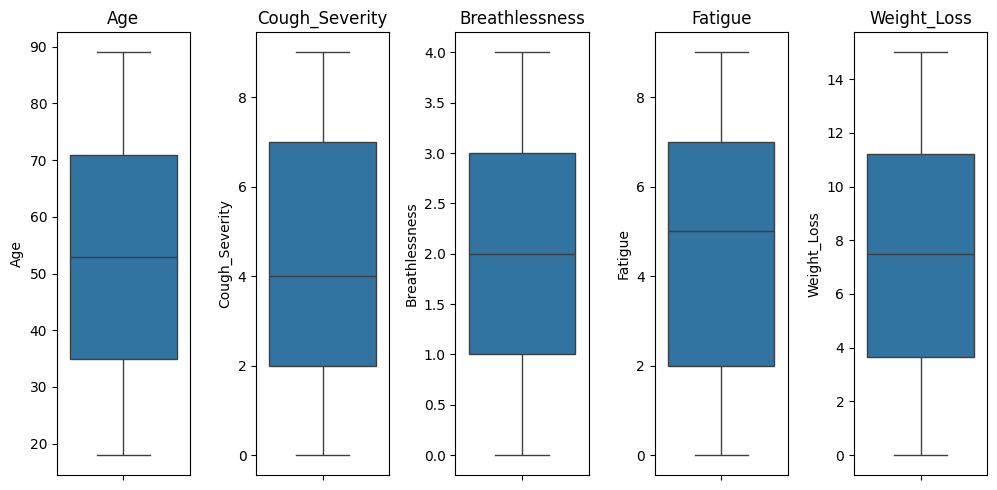

In [7]:
plt.figure(figsize=(30, 5))  

for i, col in enumerate(df.select_dtypes(include='number').columns, 1,):
    plt.subplot(1, len(df.columns), i)  
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()  
plt.show()

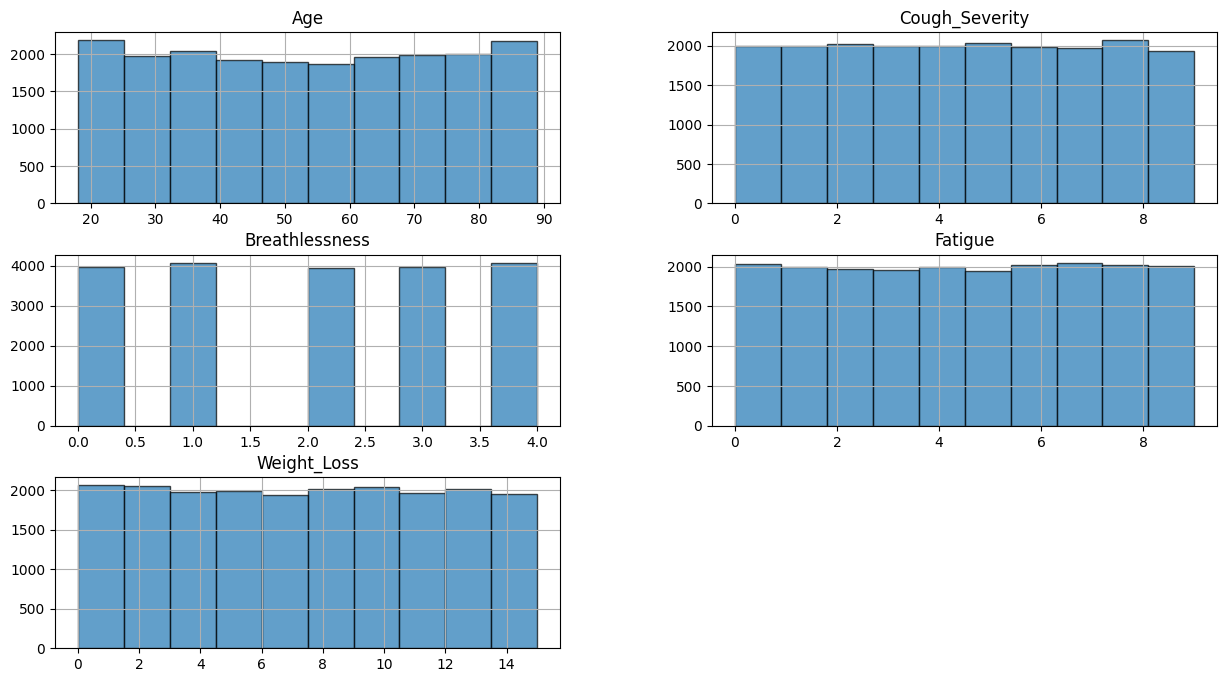

In [8]:
df.hist(edgecolor='black',alpha=0.7,figsize=(15,8))
plt.show()

### **Analyse**

## **Les colonnes categorielles** 

### La colonne **'Gender'** ###

In [9]:
df['Gender'].value_counts()

Gender
Male      10171
Female     9829
Name: count, dtype: int64

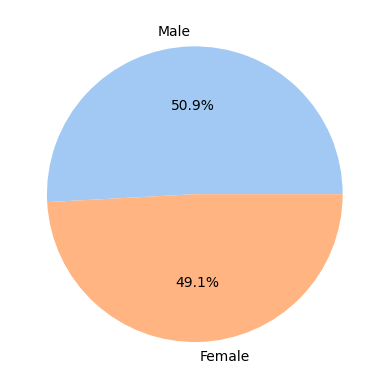

In [10]:
plt.pie(
    df['Gender'].value_counts(),
    labels=df['Gender'].unique(),
    autopct='%1.1f%%',
    colors=sns.color_palette("pastel")  
)
plt.show()

### La colonne **'Chest_Pain'** ###

In [11]:
df['Chest_Pain'].value_counts()

Chest_Pain
No     10205
Yes     9795
Name: count, dtype: int64

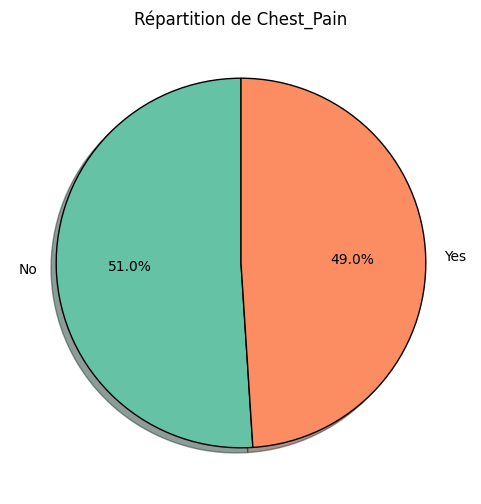

In [12]:
def pie_chart_categorique(df, colonne):

    counts = df[colonne].value_counts()
    labels = counts.index

    colors = sns.color_palette("Set2", len(labels))

    plt.figure(figsize=(6,6))
    plt.pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        shadow=True,
        wedgeprops={'edgecolor':'black'}
    )
    plt.title(f"Répartition de {colonne}")
    plt.show()

pie_chart_categorique(df, 'Chest_Pain')

### La colonne **'Fever'** ###

In [13]:
df['Fever'].value_counts()

Fever
Moderate    6713
Mild        6701
High        6586
Name: count, dtype: int64

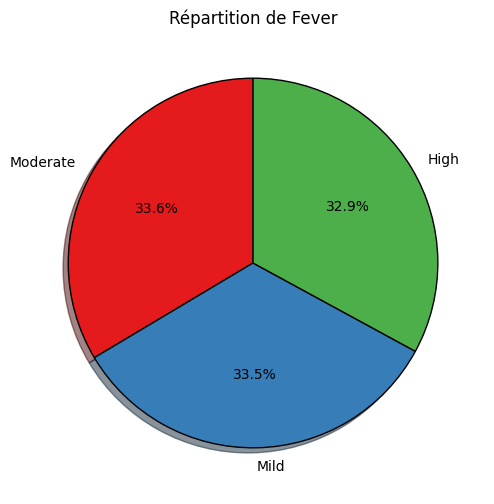

In [14]:
def pie_chart_categorique(df, colonne):

    counts = df[colonne].value_counts()
    labels = counts.index

    colors = sns.color_palette("Set1", len(labels))

    plt.figure(figsize=(6,6))
    plt.pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        shadow=True,
        wedgeprops={'edgecolor':'black'}
    )
    plt.title(f"Répartition de {colonne}")
    plt.show()

pie_chart_categorique(df, 'Fever')

### La colonne **'Night_Sweats'** ###

In [15]:
df['Night_Sweats'].value_counts()

Night_Sweats
No     10044
Yes     9956
Name: count, dtype: int64

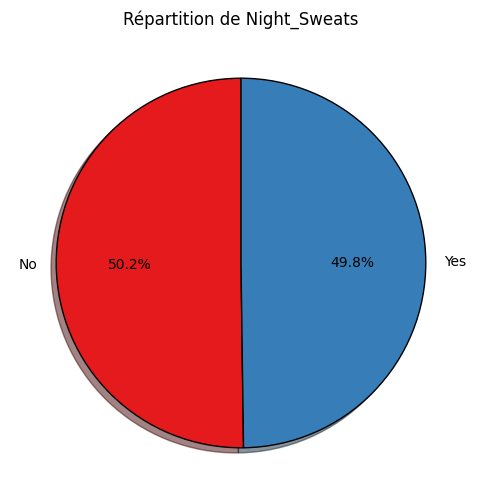

In [16]:
def pie_chart_categorique(df, colonne):

    counts = df[colonne].value_counts()
    labels = counts.index

    colors = sns.color_palette("Set1", len(labels))

    plt.figure(figsize=(6,6))
    plt.pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        shadow=True,
        wedgeprops={'edgecolor':'black'}
    )
    plt.title(f"Répartition de {colonne}")
    plt.show()

pie_chart_categorique(df, 'Night_Sweats')

### La colonne **'Sputum_Production'** ###

In [17]:
df['Sputum_Production'].value_counts()

Sputum_Production
Medium    6709
Low       6680
High      6611
Name: count, dtype: int64

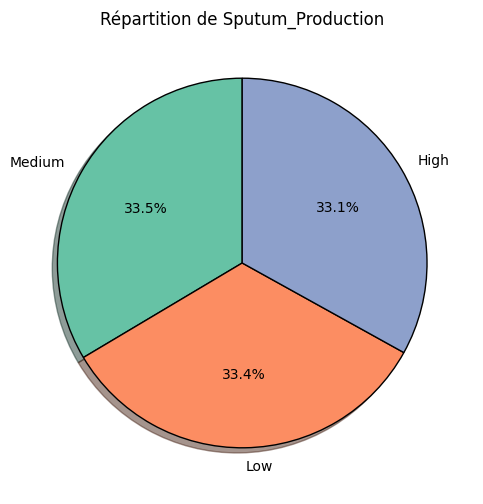

In [ ]:
 ,f pie_chart_categorique(df, colonne):

    counts = df[colonne].value_counts()
    labels = counts.index

    colors = sns.color_palette("Set2", len(labels))

    plt.figure(figsize=(6,6))
    plt.pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        shadow=True,
        wedgeprops={'edgecolor':'black'}
    )
    plt.title(f"Répartition de {colonne}")
    plt.show()

pie_chart_categorique(df, 'Sputum_Production')

### La colonne **'Blood_in_Sputum'** ###

In [19]:
df['Blood_in_Sputum'].value_counts()

Blood_in_Sputum
No     10075
Yes     9925
Name: count, dtype: int64

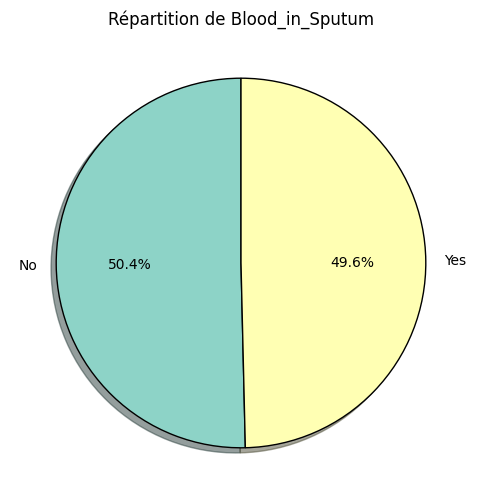

In [20]:
def pie_chart_categorique(df, colonne):

    counts = df[colonne].value_counts()
    labels = counts.index

    colors = sns.color_palette("Set3", len(labels))

    plt.figure(figsize=(6,6))
    plt.pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        shadow=True,
        wedgeprops={'edgecolor':'black'}
    )
    plt.title(f"Répartition de {colonne}")
    plt.show()

pie_chart_categorique(df, 'Blood_in_Sputum')

### La colonne **'Smoking_History'** ###

In [21]:
df['Smoking_History'].value_counts()

Smoking_History
Former     6791
Never      6616
Current    6593
Name: count, dtype: int64

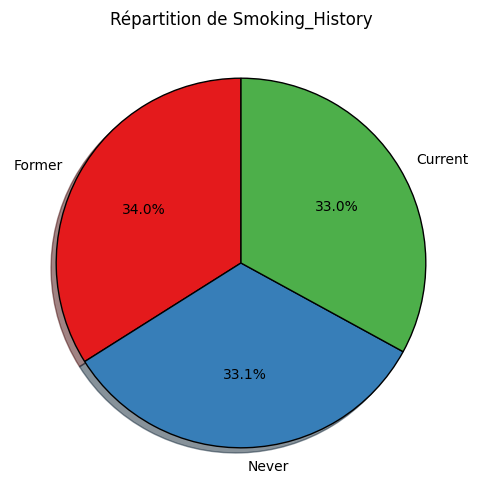

In [22]:
def pie_chart_categorique(df, colonne):

    counts = df[colonne].value_counts()
    labels = counts.index

    colors = sns.color_palette("Set1", len(labels))

    plt.figure(figsize=(6,6))
    plt.pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        shadow=True,
        wedgeprops={'edgecolor':'black'}
    )
    plt.title(f"Répartition de {colonne}")
    plt.show()

pie_chart_categorique(df, 'Smoking_History')

### La colonne **'Previous_TB_History'** ###

In [23]:
df['Previous_TB_History'].value_counts()

Previous_TB_History
Yes    10067
No      9933
Name: count, dtype: int64

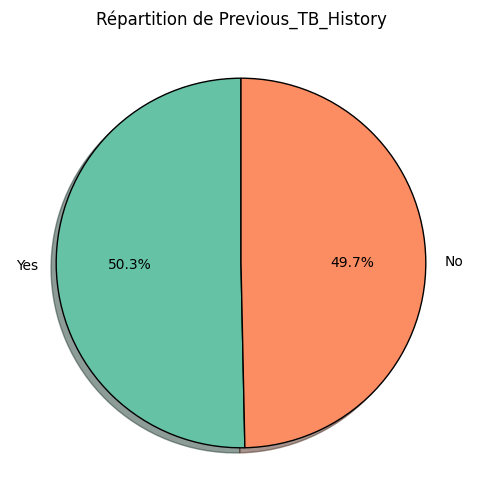

In [24]:
def pie_chart_categorique(df, colonne):

    counts = df[colonne].value_counts()
    labels = counts.index

    colors = sns.color_palette("Set2", len(labels))

    plt.figure(figsize=(6,6))
    plt.pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        shadow=True,
        wedgeprops={'edgecolor':'black'}
    )
    plt.title(f"Répartition de {colonne}")
    plt.show()

pie_chart_categorique(df, 'Previous_TB_History')

### La colonne **'Class'** ###

In [25]:
df['Class'].value_counts()

Class
Normal          14082
Tuberculosis     5918
Name: count, dtype: int64

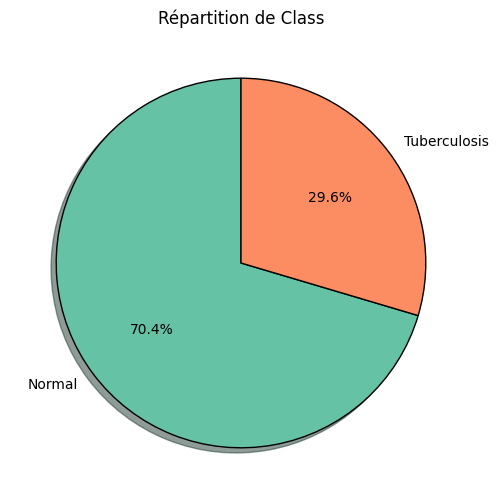

In [26]:
def pie_chart_categorique(df, colonne):

    counts = df[colonne].value_counts()
    labels = counts.index

    colors = sns.color_palette("Set2", len(labels))

    plt.figure(figsize=(6,6))
    plt.pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        shadow=True,
        wedgeprops={'edgecolor':'black'}
    )
    plt.title(f"Répartition de {colonne}")
    plt.show()

pie_chart_categorique(df, 'Class')

## **Les colonnes numeriques** 

=== Analyse complète de Age ===

count    20000.000000
mean        53.467450
std         20.773984
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


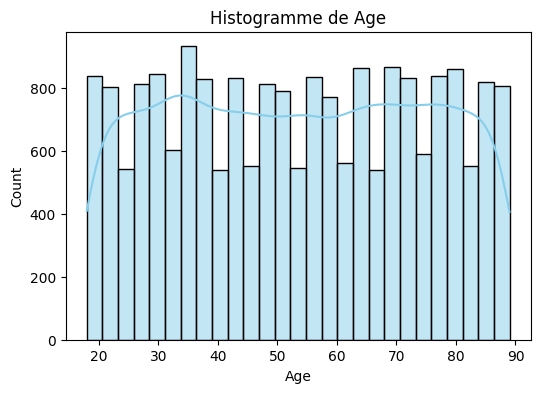

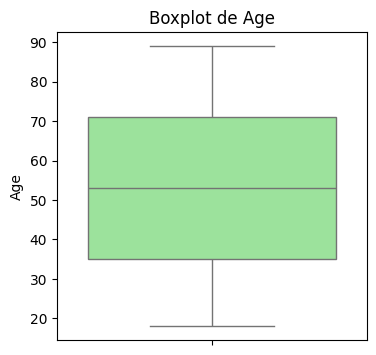

=== Analyse complète de Cough_Severity ===

count    20000.000000
mean        53.467450
std         20.773984
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


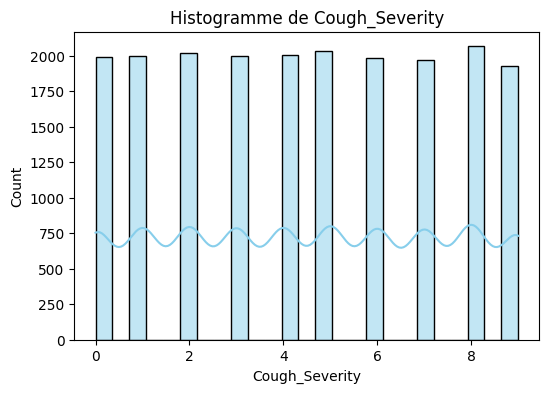

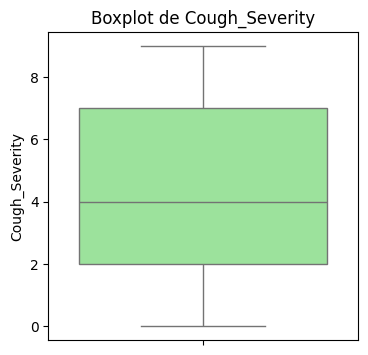

=== Analyse complète de Breathlessness ===

count    20000.000000
mean        53.467450
std         20.773984
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


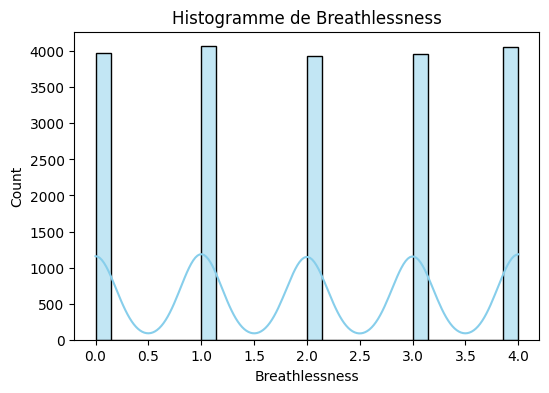

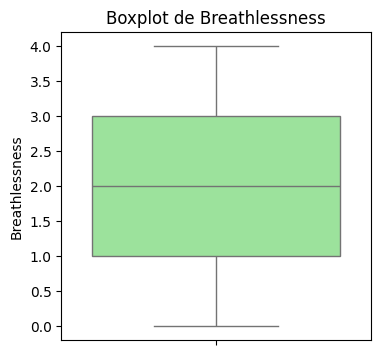

=== Analyse complète de Fatigue ===

count    20000.000000
mean        53.467450
std         20.773984
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


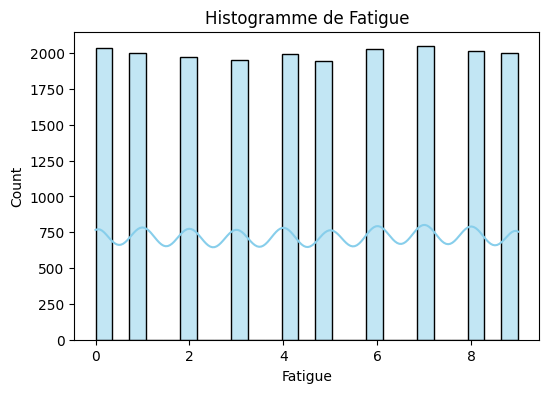

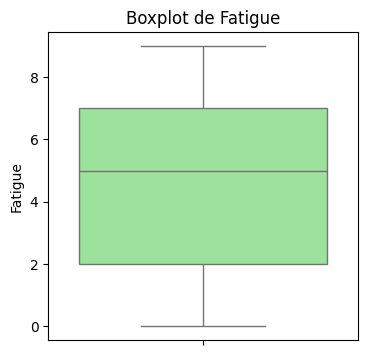

=== Analyse complète de Weight_Loss ===

count    20000.000000
mean        53.467450
std         20.773984
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


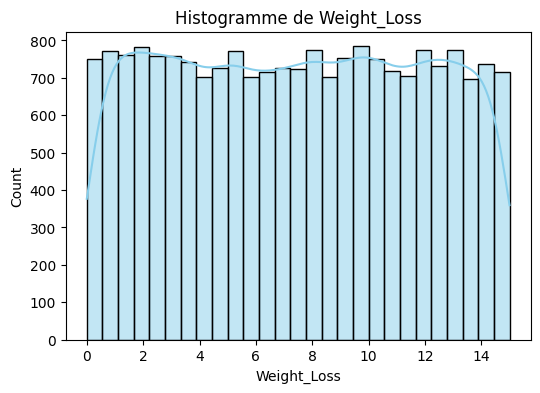

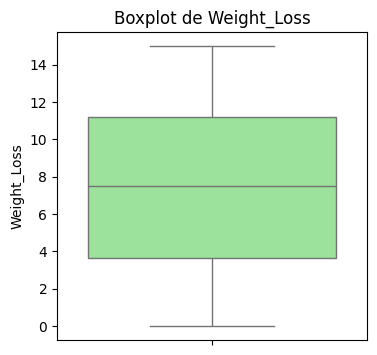

In [27]:
colonnes_numeriques = df.select_dtypes(include='number').columns
for col in colonnes_numeriques:
    print(f"=== Analyse complète de {col} ===\n")
    print(df['Age'].describe())
    
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f"Histogramme de {col}")
    plt.show()
    
    plt.figure(figsize=(4,4))
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f"Boxplot de {col}")
    plt.show()

# ***Partie : machine learning models:***

### **Séparation des features et du label**

- On crée une variable X qui contient toutes les colonnes (ou variables explicatives) du DataFrame data, sauf la colonne Class.

- Cette colonne est supprimée car elle représente la variable cible, c’est-à-dire ce que l’on veut prédire : ici, si la personne est atteinte de Tuberculosis ou Normal.

- On crée une variable y qui contient uniquement la colonne Classe.

- Cette variable représente si la personne est Tuberculosis (1) ou Normal (0).

- On sépare les données en deux parties :

* X : les caractéristiques ou facteurs explicatifs, c’est-à-dire toutes les colonnes qui expliquent l’état du patient, telles que :

Age (Âge du patient),
Gender (Sexe),
Chest_Pain (Douleur thoracique),
Cough_Severity (Sévérité de la toux),
Breathlessness (Essoufflement),
Fatigue (Fatigue),
Weight_Loss (Perte de poids),
Fever (Fièvre),
Night_Sweats (Transpiration nocturne),
Sputum_Production (Production de crachats),
Blood_in_Sputum (Sang dans les crachats),
Smoking_History (Antécédents tabagiques),
Previous_TB_History (Antécédents de TB)

* y : la variable cible (Class) indiquant si le patient est Normal (non atteint de TB) ou TB (atteint de Tuberculose).

## **LogisticRegression**

In [28]:
X = df.drop(['Patient_ID', 'Class'], axis=1)  
y = df['Class'] 

### **Transformer les colonnes numériques**

In [29]:
from sklearn.preprocessing import StandardScaler
colonnes_numeriques = X.select_dtypes(include='number').columns
scaler = StandardScaler()
X[colonnes_numeriques] = scaler.fit_transform(X[colonnes_numeriques])

### **Encodage des variables catégorielles**

In [30]:
colonnes_categorielles = X.select_dtypes(include='object').columns

le = LabelEncoder()
for col in colonnes_categorielles:
    X[col] = le.fit_transform(X[col])

In [31]:
y = le.fit_transform(y)

### **Division des données pour l'entraînement et le test**

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Cette fonction divise les données en deux ensembles : un ensemble d'entraînement et un ensemble de test.

80% pour l'entraînement (X_train, y_train)

20% pour le test (X_test, y_test)

random_state=42 : pour rendre le tirage reproductible 

In [33]:
print(f"Taille du jeu d'entraînement : {X_train.shape}")
print(f"Taille du jeu de test : {X_test.shape}")

Taille du jeu d'entraînement : (16000, 13)
Taille du jeu de test : (4000, 13)


In [34]:
model_LogisticRegression = LogisticRegression(max_iter=1000)
model_LogisticRegression.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### **Prédiction sur les données de test**

In [35]:
y_pred = model_LogisticRegression.predict(X_test)

### **Visualisation des résultats**

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


- La précision du modèle sera affichée sous forme de pourcentage,  Accuracy: 0.70

### **Matrice de confusion**

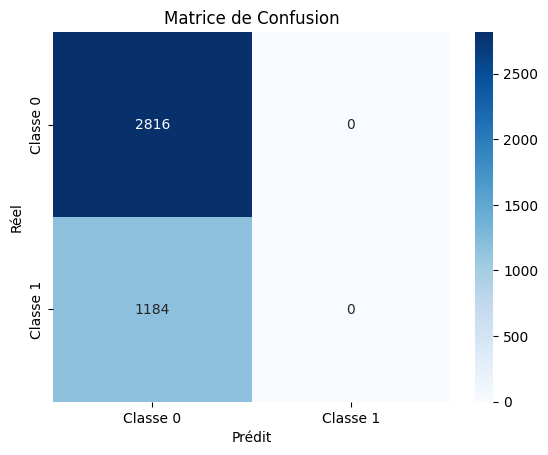

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

- Une matrice de confusion sera affichée à l'écran, permettant de visualiser la performance du modèle en termes de vrais positifs, vrais négatifs, faux positifs et faux négatifs.

### **Calcul de la courbe ROC**

In [38]:
y_scores = model_LogisticRegression.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

### **Affichage de la courbe ROC**

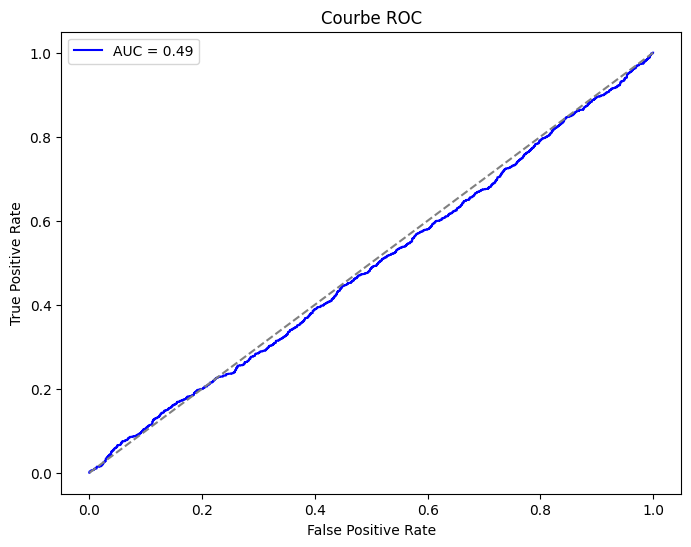

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

AUC = 0.49 signifie que le modèle pour prédire la tuberculose est très faible et ne peut distinguer correctement les patients atteints de TB des patients normaux que dans environ 49% des cas, ce qui est presque équivalent à un tirage au sort

- Calcul de la courbe ROC pour évaluer le compromis entre le taux de faux positifs et le taux de vrais positifs.
- Calcul de l’AUC pour mesurer la performance globale du modèle.

### **Évaluation du modèle**

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

Précision du modèle : 0.70

Rapport de classification :
               precision    recall  f1-score   support

           0       0.70      1.00      0.83      2816
           1       0.00      0.00      0.00      1184

    accuracy                           0.70      4000
   macro avg       0.35      0.50      0.41      4000
weighted avg       0.50      0.70      0.58      4000



C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificatio

Le modèle est performant pour la classe 0 (patients normaux) : precision = 0.70, recall = 1.00.

Le modèle est très faible pour la classe 1 (patients atteints de Tuberculose) : precision = 0.00, recall = 0.00 → ce problème est courant avec des datasets déséquilibrés.

L’accuracy globale est de 0.70, ce qui semble correcte, mais elle masque la faiblesse pour la classe TB.

## **Validation**

### **Séparation des features et de la cible**

In [41]:
X = df.drop(['Patient_ID', 'Class'], axis=1)  
y = df['Class'] 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.model_selection import cross_val_score,KFold

In [44]:
le = LabelEncoder()
for col in colonnes_categorielles:
    X[col] = le.fit_transform(X[col])

In [45]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(model_LogisticRegression,X,y,cv=kf)
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation croisée : [0.6965  0.707   0.70425 0.7015  0.71125]
Score moyen : 0.70


#### Le code utilise la validation croisée pour évaluer la performance d'un modèle de machine learning. Cependant, il semble y avoir un avertissement concernant la convergence du modèle, ce qui pourrait nécessiter un ajustement des paramètres ou une normalisation des données.

#### Scores de validation croisée : [0.6965  0.707   0.70425 0.7015  0.71125]
#### Score moyen : 0.70

### **Equelibrage de donnees**

### Pour remédier au déséquilibre entre les classes, nous avons utilisé la technique SMOTE (Synthetic Minority Over-sampling Technique), qui consiste à générer artificiellement de nouvelles instances de la classe minoritaire, afin d'améliorer la capacité du modèle à la reconnaître et à éviter un biais en faveur de la classe majoritaire.

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

In [47]:
X_trainL, X_testL, y_trainL, y_testL = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainL = scaler.fit_transform(X_trainL)
X_testL = scaler.transform(X_testL)

In [49]:
model = LogisticRegression(max_iter=1000)
model.fit(X_trainL, y_trainL)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [50]:
y_predL = model.predict(X_testL)

In [51]:
accuracyLogistic = accuracy_score(y_testL, y_predL)
print(f"Accuracy Logistic: {accuracyLogistic:.2f}")

Accuracy Logistic: 0.62


### **Matrice de confusion apres equelibrage**

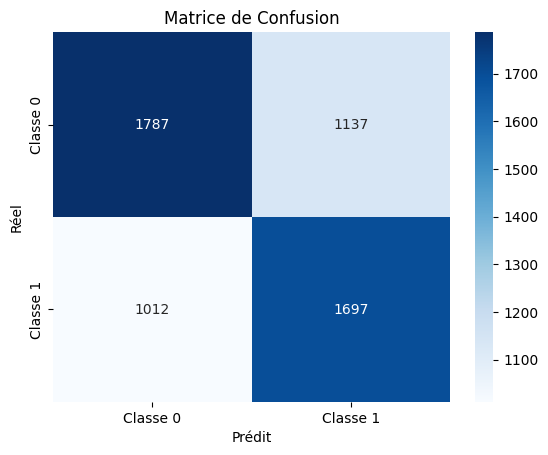

In [52]:
conf_matrixLogistic = confusion_matrix(y_testL, y_predL)
sns.heatmap(conf_matrixLogistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### **Calcul de la courbe ROC** 

In [53]:
le = LabelEncoder()
y_trainL = le.fit_transform(y_trainL)  
y_testL = le.transform(y_testL)

In [54]:
y_scoresL = model.predict_proba(X_testL)[:, 1]
fprL, tprL, _ = roc_curve(y_testL, y_scoresL)
roc_aucL = auc(fprL, tprL)

### **Affichage de la courbe ROC**

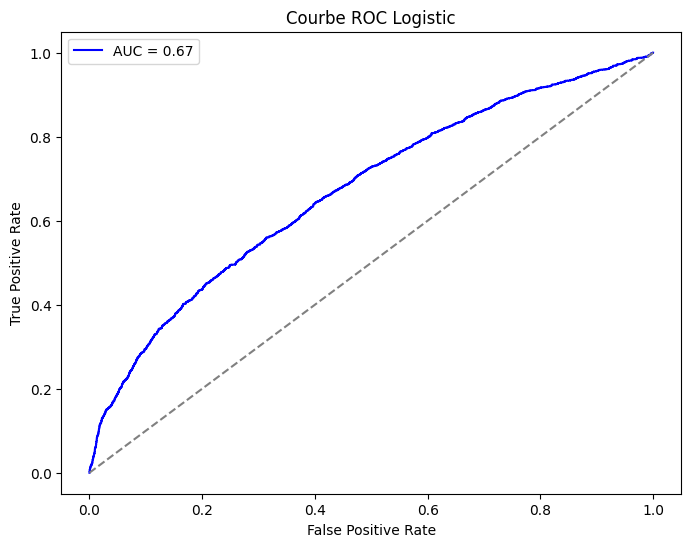

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(fprL, tprL, color='blue', label=f'AUC = {roc_aucL:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC Logistic')
plt.legend()
plt.show()

### **Évaluation du modèle**

In [56]:
y_predL = le.fit_transform(y_predL) 

In [57]:
accuracyLogistic= accuracy_score(y_testL, y_predL)
print(f"Précision du modèle Logistic : {accuracyLogistic:.2f}")
print("\nRapport de classification Logistic:\n", classification_report(y_testL, y_predL))

Précision du modèle Logistic : 0.62

Rapport de classification Logistic:
               precision    recall  f1-score   support

           0       0.64      0.61      0.62      2924
           1       0.60      0.63      0.61      2709

    accuracy                           0.62      5633
   macro avg       0.62      0.62      0.62      5633
weighted avg       0.62      0.62      0.62      5633



## **KNN**

### **Séparation des features et de la cible**

In [58]:
X = df.drop(['Patient_ID', 'Class'], axis=1)  
y = df['Class'] 

In [59]:
colonnes_categorielles = X.select_dtypes(include='object').columns

le = LabelEncoder()
for col in colonnes_categorielles:
    X[col] = le.fit_transform(X[col])

y_encoded = LabelEncoder().fit_transform(y)

In [60]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X,y)

In [61]:
X_trainK, X_testK, y_trainK, y_testK = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trainK = scaler.fit_transform(X_trainK)
X_testK = scaler.transform(X_testK)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_trainK,y_trainK)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


- Le modèle utilisé ici est le KNeighborsClassifier de la bibliothèque sklearn.
   - Le nombre de voisins (n_neighbors=5) est spécifié pour l'algorithme K-Nearest Neighbors (KNN).
   - La fonction fit est utilisée pour entraîner le modèle en utilisant les données d'entraînement X_trainK et y_trainK.

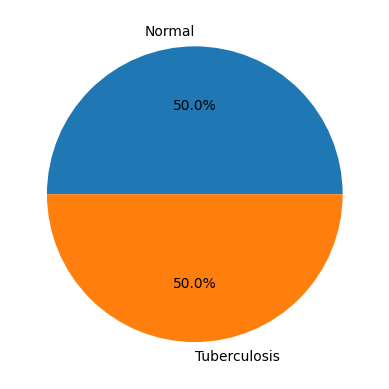

In [64]:
plt.pie(y_resampled.value_counts(),labels=df['Class'].unique(),autopct='%1.1f%%')
plt.show()

### **Prédiction sur les données de test**

In [65]:
y_predK = knn.predict(X_testK)

In [66]:
accuracyknn = accuracy_score(y_testK, y_predK)
print(f"Accuracy knn: {accuracyknn:.2f}")

Accuracy knn: 0.62


### **Matrice de confusion**

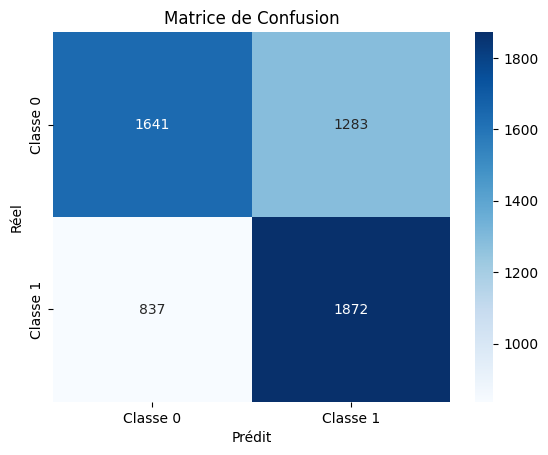

In [67]:
conf_matrixknn = confusion_matrix(y_testK, y_predK)
sns.heatmap(conf_matrixknn, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### **Calcul de la courbe ROC**

In [68]:
y_testK = le.fit_transform(y_testK,)

In [69]:
y_scoresK = knn.predict_proba(X_testK)[:, 1]
fprk, tprk, _ = roc_curve(y_testK, y_scoresK)
roc_auck = auc(fprk, tprk)

### **Affichage de la courbe ROC**

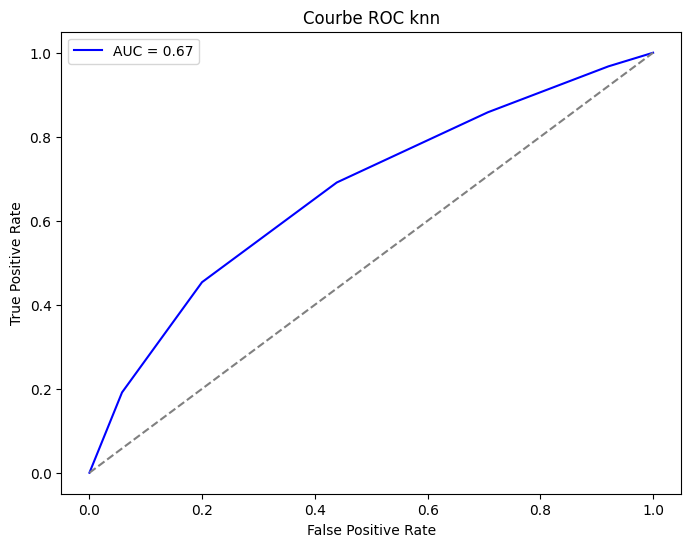

In [70]:
plt.figure(figsize=(8, 6))
plt.plot(fprk, tprk, color='blue', label=f'AUC = {roc_auck:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC knn')
plt.legend()
plt.show()

### **Évaluation du modèle**

In [71]:
y_predK = le.fit_transform(y_predK) 

In [72]:
accuracyknn = accuracy_score(y_testK, y_predK)
print(f"Précision du modèle knn : {accuracyknn:.2f}")
print("\nRapport de classification knn :\n", classification_report(y_testK, y_predK))

Précision du modèle knn : 0.62

Rapport de classification knn :
               precision    recall  f1-score   support

           0       0.66      0.56      0.61      2924
           1       0.59      0.69      0.64      2709

    accuracy                           0.62      5633
   macro avg       0.63      0.63      0.62      5633
weighted avg       0.63      0.62      0.62      5633



## **DecisionTreeClassifier**

### **Séparation des features et de la cible**

In [73]:
X = df.drop(['Patient_ID', 'Class'], axis=1)  
y = df['Class'] 

In [74]:
X = X.copy()
colonnes_categorielles = X.select_dtypes(include='object').columns
le = LabelEncoder()
for col in colonnes_categorielles:
    X[col] = le.fit_transform(X[col])

y = LabelEncoder().fit_transform(y)

In [75]:
from sklearn.preprocessing import StandardScaler
colonnes_numeriques = X.select_dtypes(include='number').columns
scaler = StandardScaler()
X[colonnes_numeriques] = scaler.fit_transform(X[colonnes_numeriques])

In [76]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X,y)

In [77]:
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [78]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_trainDT = scaler.fit_transform(X_trainDT)
X_testDT = scaler.transform(X_testDT)

### **Définition du modèle d'arbre de décision**

In [79]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dt.fit(X_trainDT, y_trainDT)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### **Visualisation de l’arbre de décision**

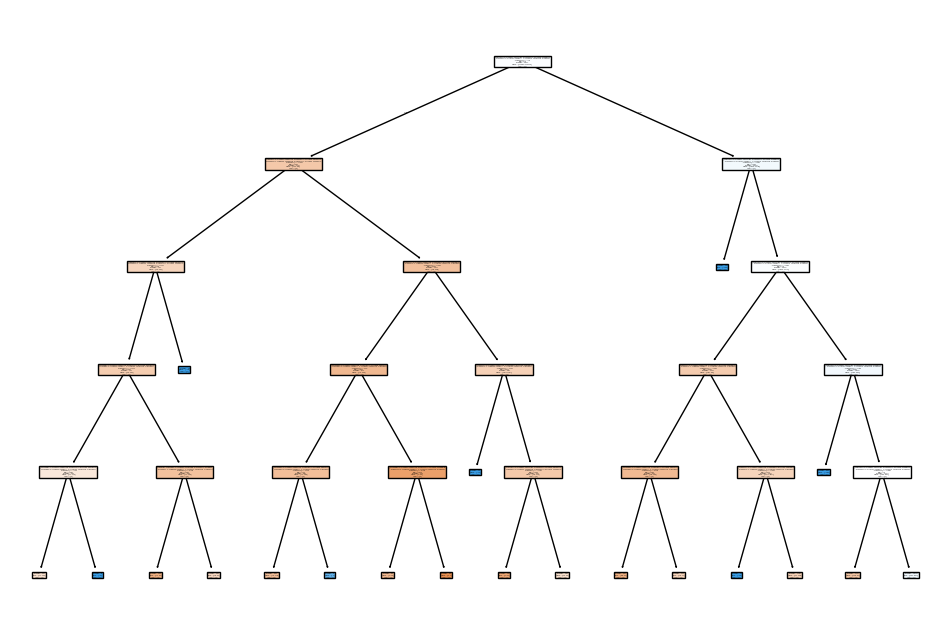

In [80]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=X_trainDT, class_names=True)
plt.show()

### **Prédictions sur les données de test**

In [81]:
y_predDT = dt.predict(X_testDT)

### **Calcul de l'accuracy**

In [82]:
accuracydt = accuracy_score(y_testDT, y_predDT)
print(f"Précision du modèle d'Arbre de Décision: {accuracydt:.2f}")

Précision du modèle d'Arbre de Décision: 0.56


### **Évaluation du modèle**

In [83]:
accuracydt = accuracy_score(y_testDT, y_predDT)
print(f"Précision du modèle : {accuracydt:.2f}")
print("\nRapport de classification dt :\n", classification_report(y_testDT, y_predDT))

Précision du modèle : 0.56

Rapport de classification dt :
               precision    recall  f1-score   support

           0       0.67      0.30      0.41      2924
           1       0.53      0.84      0.65      2709

    accuracy                           0.56      5633
   macro avg       0.60      0.57      0.53      5633
weighted avg       0.60      0.56      0.52      5633



### **Matrice de confusion**

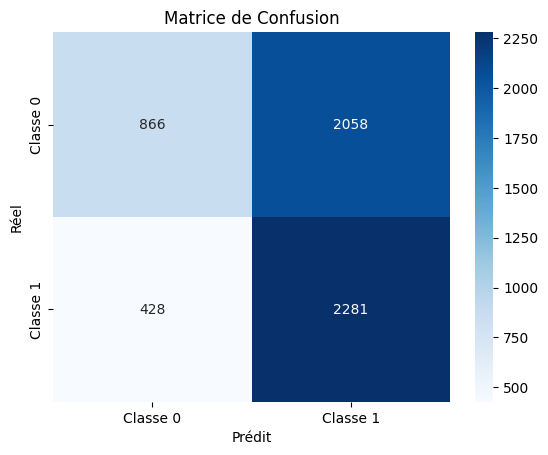

In [84]:
conf_matrixdt = confusion_matrix(y_testDT, y_predDT)
sns.heatmap(conf_matrixdt, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### **Calcul de la courbe ROC**

In [85]:
y_scoresDT = dt.predict_proba(X_testDT)[:, 1]
fprdt, tprdt, _ = roc_curve(y_testDT, y_scoresDT)
roc_aucdt = auc(fprdt, tprdt)

### **Affichage de la courbe ROC**

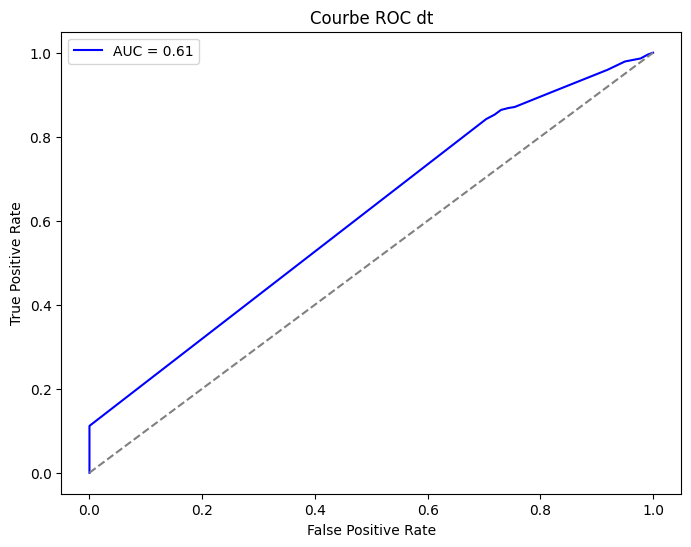

In [86]:
plt.figure(figsize=(8, 6))
plt.plot(fprdt, tprdt, color='blue', label=f'AUC = {roc_aucdt:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC dt')
plt.legend()
plt.show()

In [87]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(dt,X_resampled,y_resampled,cv=kf)
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation croisée : [0.55867211 0.57447186 0.60660394 0.60607137 0.62002841]
Score moyen : 0.59


## **RandomForestClassifier**

### **Séparation des features et de la cible**

In [88]:
X = df.drop(['Patient_ID', 'Class'], axis=1)  
y = df['Class'] 

In [89]:
X = X.copy()
colonnes_categorielles = X.select_dtypes(include='object').columns
le = LabelEncoder()
for col in colonnes_categorielles:
    X[col] = le.fit_transform(X[col])

y = LabelEncoder().fit_transform(y)

colonnes_numeriques = X.select_dtypes(include='number').columns
scaler = StandardScaler()
X[colonnes_numeriques] = scaler.fit_transform(X[colonnes_numeriques])

In [90]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X,y)

In [91]:
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainR = scaler.fit_transform(X_trainR)
X_testR = scaler.transform(X_testR)

### **Création et entraînement du modèle Random Forest**

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=300, criterion="gini", max_depth=150, random_state=42)
rf_classifier.fit(X_trainR, y_trainR)

,n_estimators,300
,criterion,'gini'
,max_depth,150
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### **Prédiction sur les données test**

In [94]:
y_predR = rf_classifier.predict(X_testR)

### **Calcul de l'accuracy**

In [95]:
accuracyRandomForest = accuracy_score(y_testR, y_predR)
print(f"Précision du modèle RandomForestClassifier: {accuracyRandomForest:.2f}")

Précision du modèle RandomForestClassifier: 0.80


### **Évaluation du modèle**

In [96]:
accuracyRandomForest = accuracy_score(y_testR, y_predR)
print(f"Précision du modèle : {accuracyRandomForest:.2f}")
print("\nRapport de classification RandomForest :\n", classification_report(y_testR, y_predR))

Précision du modèle : 0.80

Rapport de classification RandomForest :
               precision    recall  f1-score   support

           0       0.74      0.95      0.83      2924
           1       0.93      0.64      0.76      2709

    accuracy                           0.80      5633
   macro avg       0.83      0.80      0.80      5633
weighted avg       0.83      0.80      0.80      5633



### **Matrice de confusion**

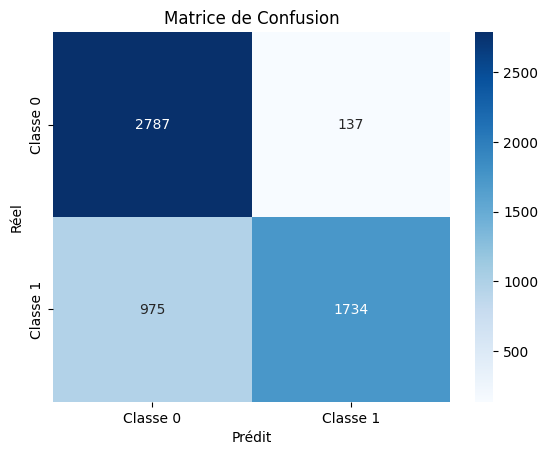

In [97]:
conf_matrixRandomForest = confusion_matrix(y_testR, y_predR)
sns.heatmap(conf_matrixRandomForest, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### **Calcul de la courbe ROC**

In [98]:
y_scoresR = rf_classifier.predict_proba(X_testR)[:, 1]
fprR, tprR, _ = roc_curve(y_testR, y_scoresR)
roc_aucR = auc(fprR, tprR)

### **Affichage de la courbe ROC**

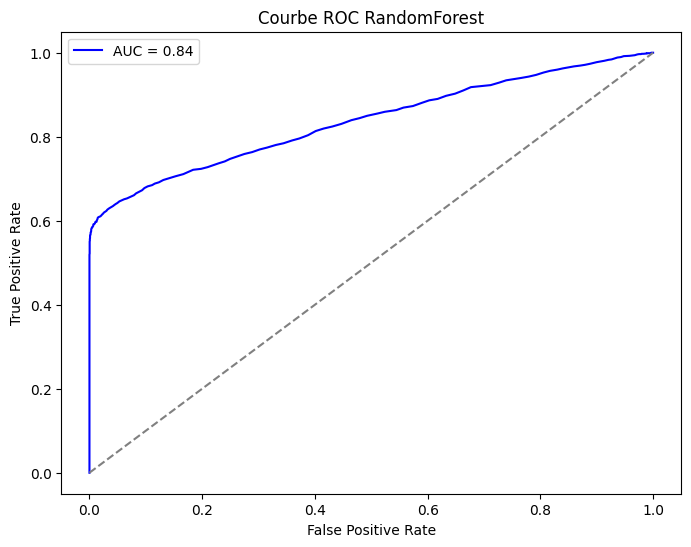

In [99]:
plt.figure(figsize=(8, 6))
plt.plot(fprR, tprR, color='blue', label=f'AUC = {roc_aucR:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC RandomForest')
plt.legend()
plt.show()

In [100]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(rf_classifier,X_resampled,y_resampled,cv=kf)
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation croisée : [0.80046157 0.78981005 0.7915853  0.79779869 0.80752841]
Score moyen : 0.80


## **SVC**

### **Séparation des features et de la cible**

In [101]:
X = df.drop(['Patient_ID', 'Class'], axis=1)  
y = df['Class'] 

In [102]:
X = X.copy()
colonnes_categorielles = X.select_dtypes(include='object').columns
le = LabelEncoder()
for col in colonnes_categorielles:
    X[col] = le.fit_transform(X[col])

y = LabelEncoder().fit_transform(y)

colonnes_numeriques = X.select_dtypes(include='number').columns
scaler = StandardScaler()
X[colonnes_numeriques] = scaler.fit_transform(X[colonnes_numeriques])

In [103]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X,y)

In [104]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [105]:
scaler = StandardScaler()
X_trainS = scaler.fit_transform(X_trainS)
X_testS = scaler.transform(X_testS)

### **Création et entraînement du modèle SVM**

In [106]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel="rbf", C=1.0)
svm_classifier.fit(X_trainS, y_trainS)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### **Calcul de l'accuracy**

In [107]:
y_predS = svm_classifier.predict(X_testS)

In [108]:
y_predS = accuracySVC = accuracy_score(y_testS,y_predS)
print(f"Précision du modèle RandomForestClassifier: {accuracySVC:.2f}")
y_predS = svm_classifier.predict(X_testS)
print(classification_report(y_testS, y_predS))

Précision du modèle RandomForestClassifier: 0.60
              precision    recall  f1-score   support

           0       0.65      0.50      0.56      2924
           1       0.57      0.71      0.63      2709

    accuracy                           0.60      5633
   macro avg       0.61      0.60      0.60      5633
weighted avg       0.61      0.60      0.60      5633



### **Matrice de confusion**

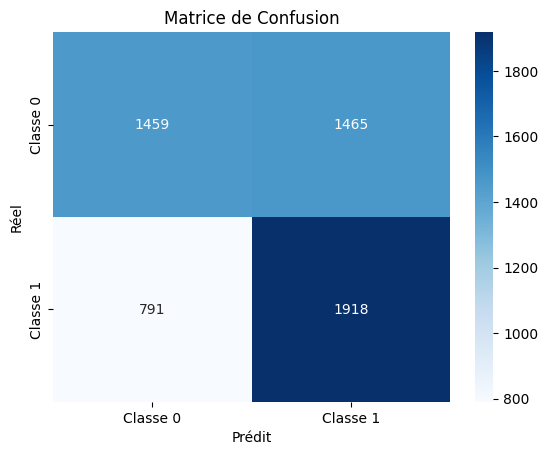

In [109]:
conf_matrixSVC = confusion_matrix(y_testS, y_predS)
sns.heatmap(conf_matrixSVC, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [110]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(svm_classifier,X_resampled,y_resampled,cv=kf)
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation croisée : [0.5993254  0.60358601 0.59755015 0.60624889 0.61381392]
Score moyen : 0.60


## **La comparaison entre les models**

### **l'accuracy et matrice de confusion de LogisticRegression**

Accuracy Logistic: 0.62

Rapport de classification Logistic:
               precision    recall  f1-score   support

           0       0.64      0.61      0.62      2924
           1       0.60      0.63      0.61      2709

    accuracy                           0.62      5633
   macro avg       0.62      0.62      0.62      5633
weighted avg       0.62      0.62      0.62      5633



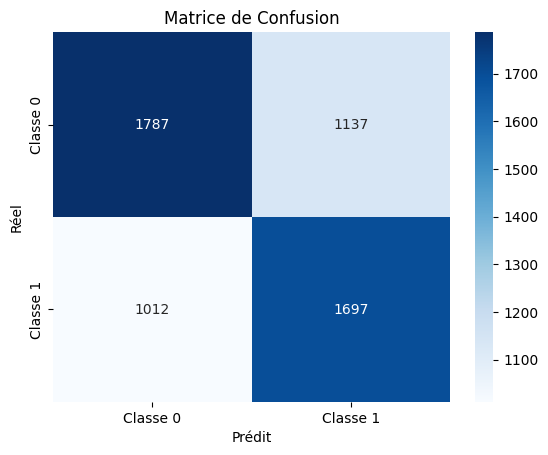

In [111]:
accuracyLogistic = accuracy_score(y_testL, y_predL)
print(f"Accuracy Logistic: {accuracyLogistic:.2f}")
print("\nRapport de classification Logistic:\n", classification_report(y_testL, y_predL))
 
conf_matrixLogistic = confusion_matrix(y_testL, y_predL)
sns.heatmap(conf_matrixLogistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### **l'accuracy et matrice de confusion de KNN**

Accuracy knn: 0.62

Rapport de classification knn :
               precision    recall  f1-score   support

           0       0.66      0.56      0.61      2924
           1       0.59      0.69      0.64      2709

    accuracy                           0.62      5633
   macro avg       0.63      0.63      0.62      5633
weighted avg       0.63      0.62      0.62      5633



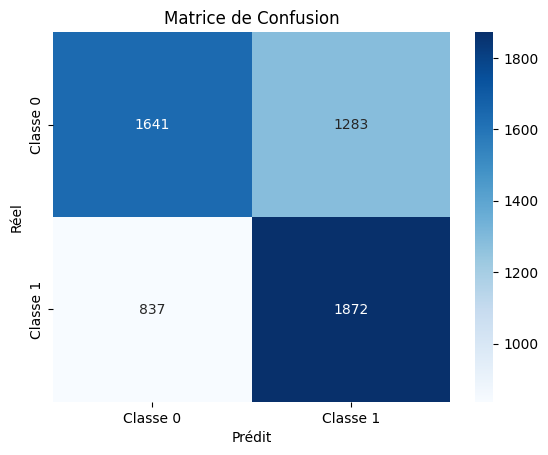

In [112]:
accuracyknn = accuracy_score(y_testK, y_predK)
print(f"Accuracy knn: {accuracyknn:.2f}")
print("\nRapport de classification knn :\n", classification_report(y_testK, y_predK))

conf_matrixknn = confusion_matrix(y_testK, y_predK)
sns.heatmap(conf_matrixknn, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### **l'accuracy et matrice de confusion de DecisionTreeClassifier**

Précision du modèle d'Arbre de Décision: 0.56

Rapport de classification dt :
               precision    recall  f1-score   support

           0       0.67      0.30      0.41      2924
           1       0.53      0.84      0.65      2709

    accuracy                           0.56      5633
   macro avg       0.60      0.57      0.53      5633
weighted avg       0.60      0.56      0.52      5633



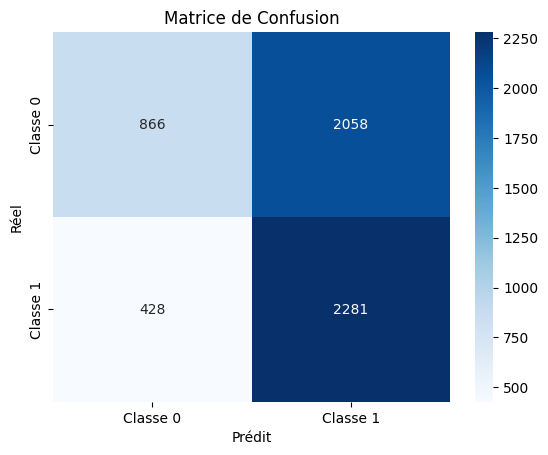

In [113]:
accuracydt = accuracy_score(y_testDT, y_predDT)
print(f"Précision du modèle d'Arbre de Décision: {accuracydt:.2f}")
print("\nRapport de classification dt :\n", classification_report(y_testDT, y_predDT))

conf_matrixdt = confusion_matrix(y_testDT, y_predDT)
sns.heatmap(conf_matrixdt, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### **l'accuracy et matrice de confusion de RandomForestClassifier**

Précision du modèle RandomForestClassifier: 0.80

Rapport de classification RandomForest :
               precision    recall  f1-score   support

           0       0.74      0.95      0.83      2924
           1       0.93      0.64      0.76      2709

    accuracy                           0.80      5633
   macro avg       0.83      0.80      0.80      5633
weighted avg       0.83      0.80      0.80      5633



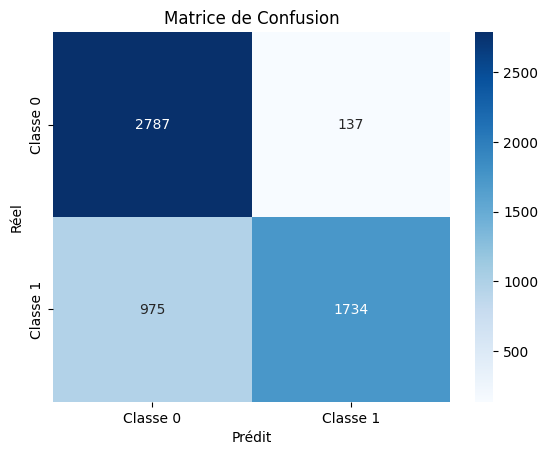

In [114]:
accuracyRandomForest = accuracy_score(y_testR, y_predR)
print(f"Précision du modèle RandomForestClassifier: {accuracyRandomForest:.2f}")
print("\nRapport de classification RandomForest :\n", classification_report(y_testR, y_predR))

conf_matrixRandomForest = confusion_matrix(y_testR, y_predR)
sns.heatmap(conf_matrixRandomForest, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### **l'accuracy et matrice de confusion de SVC**

Précision du modèle SVC: 0.60
              precision    recall  f1-score   support

           0       0.65      0.50      0.56      2924
           1       0.57      0.71      0.63      2709

    accuracy                           0.60      5633
   macro avg       0.61      0.60      0.60      5633
weighted avg       0.61      0.60      0.60      5633



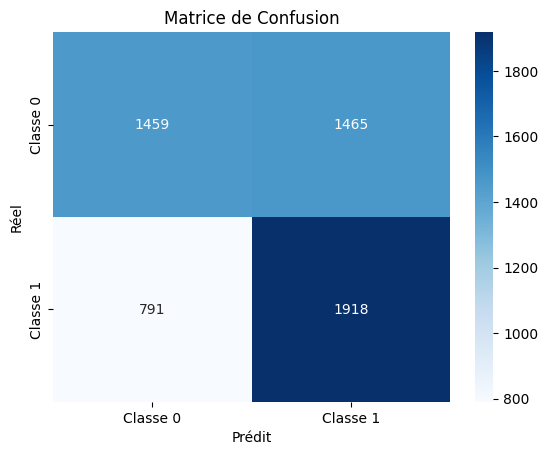

In [115]:
accuracySVC = accuracy_score(y_testS, y_predS)
print(f"Précision du modèle SVC: {accuracySVC:.2f}")
print(classification_report(y_testS, y_predS))

conf_matrixSVC = confusion_matrix(y_testS, y_predS)
sns.heatmap(conf_matrixSVC, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### **Affichage de la courbe ROC de tous les models**

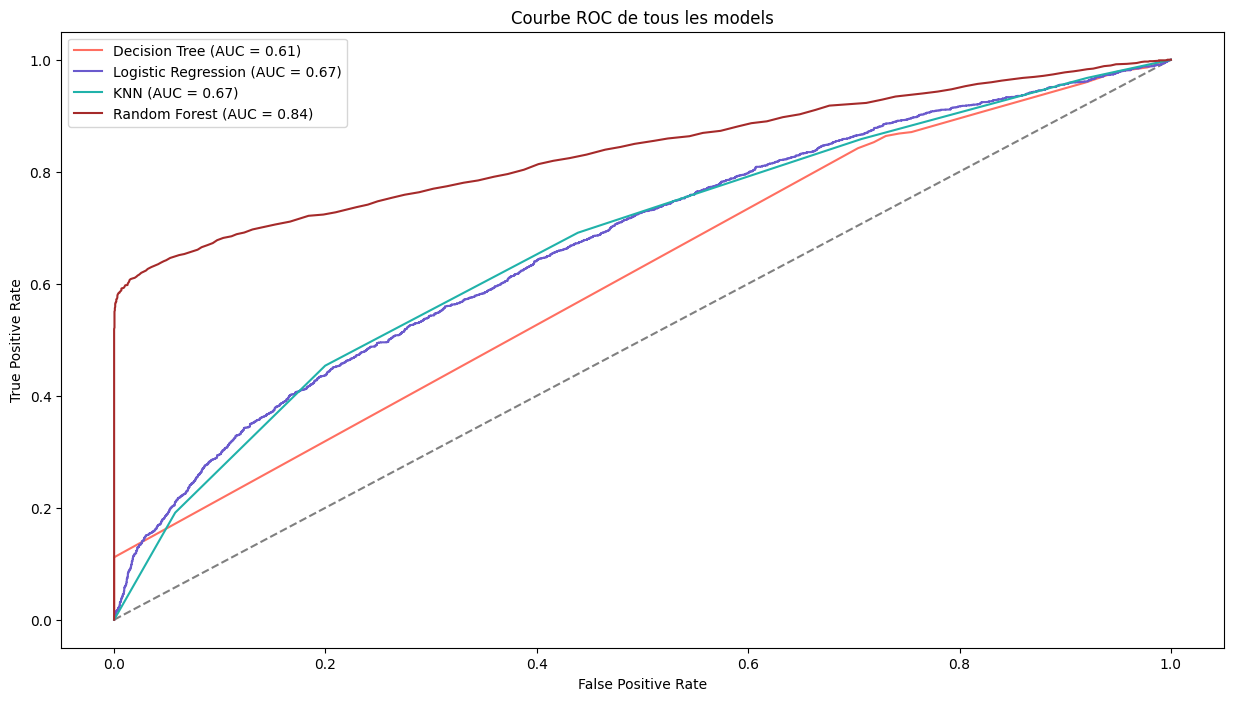

In [116]:
plt.figure(figsize=(15, 8))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.plot(fprdt, tprdt, color='#FF6F61', label=f'Decision Tree (AUC = {roc_aucdt:.2f})')       
plt.plot(fprL, tprL, color='#6A5ACD', label=f'Logistic Regression (AUC = {roc_aucL:.2f})')    
plt.plot(fprk, tprk, color='#20B2AA', label=f'KNN (AUC = {roc_auck:.2f})')                    
plt.plot(fprR, tprR, color='brown', label=f'Random Forest (AUC = {roc_aucR:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC de tous les models')
plt.legend()
plt.show()

### Random Forest est le meilleur avec une précision de 0.80

### KNN et Régression Logistique  arrive juste après avec : 0.62

### Arbre de Décision : 0.61

### SVC avec : 0.60

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('ggplot')
np.random.seed(42)

In [118]:
# Copie des données
df_processed = df.copy()

# Encodage de la target
le_target = LabelEncoder()
df_processed['Class'] = le_target.fit_transform(df_processed['Class'])

# Encodage des features catégorielles
categorical_cols = ['Gender', 'Chest_Pain', 'Fever', 'Night_Sweats', 
                   'Sputum_Production', 'Blood_in_Sputum', 'Smoking_History', 
                   'Previous_TB_History']

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    le_dict[col] = le

# Feature Engineering Avancé
df_processed['Symptom_Score'] = df_processed['Cough_Severity'] + df_processed['Breathlessness'] + df_processed['Fatigue']
df_processed['Fever_Fatigue_Ratio'] = df_processed['Fever'] / (df_processed['Fatigue'] + 1)
df_processed['Respiratory_Stress'] = df_processed['Cough_Severity'] * df_processed['Breathlessness']
df_processed['Risk_Score'] = df_processed['Smoking_History'] + df_processed['Previous_TB_History'] + df_processed['Blood_in_Sputum']

# Gestion des valeurs infinies
df_processed = df_processed.replace([np.inf, -np.inf], 0)
df_processed = df_processed.fillna(0)

print("Nouvelles features créées:")
print(df_processed[['Symptom_Score', 'Fever_Fatigue_Ratio', 'Respiratory_Stress', 'Risk_Score']].head())

Nouvelles features créées:
   Symptom_Score  Fever_Fatigue_Ratio  Respiratory_Stress  Risk_Score
0              6             0.500000                   2           3
1             12             0.200000                   0           1
2             10             0.250000                   0           0
3              8             0.285714                   0           4
4             14             0.000000                  14           3


In [119]:
# Séparation features/target
X = df_processed.drop(['Patient_ID', 'Class'], axis=1)
y = df_processed['Class']

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")
print(f"Target distribution - Train: {np.bincount(y_train)}")
print(f"Target distribution - Test: {np.bincount(y_test)}")

Train shape: (16000, 17)
Test shape: (4000, 17)
Target distribution - Train: [11266  4734]
Target distribution - Test: [2816 1184]


In [120]:
def optimize_xgb(trial):
    """Optimisation automatique des hyperparamètres avec Optuna"""
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'max_depth': trial.suggest_int('max_depth', 4, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'random_state': 42
    }
    
    model = XGBClassifier(**params)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

# Lancement de l'optimisation
print("Optimisation XGBoost en cours...")
study = optuna.create_study(direction='maximize')
study.optimize(optimize_xgb, n_trials=50, show_progress_bar=True)

print(f"Meilleur score Optuna: {study.best_value:.4f}")
print("Meilleurs paramètres:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

[I 2026-02-05 15:34:20,173] A new study created in memory with name: no-name-06132ef7-e181-418c-9927-08778d9b02ee


Optimisation XGBoost en cours...


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2026-02-05 15:34:45,303] Trial 0 finished with value: 0.68175 and parameters: {'n_estimators': 536, 'max_depth': 4, 'learning_rate': 0.11686363513229767, 'subsample': 0.8916555770123024, 'colsample_bytree': 0.9738430946327771, 'gamma': 0.020860043636138026, 'reg_alpha': 0.846639089703719, 'reg_lambda': 0.501577385227809}. Best is trial 0 with value: 0.68175.
[I 2026-02-05 15:35:16,186] Trial 1 finished with value: 0.6579375 and parameters: {'n_estimators': 451, 'max_depth': 12, 'learning_rate': 0.2170970983861481, 'subsample': 0.732928930259631, 'colsample_bytree': 0.9186881684006833, 'gamma': 0.9929532877005686, 'reg_alpha': 0.9179090778995032, 'reg_lambda': 0.9273871901346867}. Best is trial 0 with value: 0.68175.
[I 2026-02-05 15:36:59,715] Trial 2 finished with value: 0.6479375 and parameters: {'n_estimators': 458, 'max_depth': 8, 'learning_rate': 0.25728279506396834, 'subsample': 0.8878827064973864, 'colsample_bytree': 0.8630139580334887, 'gamma': 0.35560052268299014, 'reg_alph

In [121]:
# Modèle avec les meilleurs paramètres
best_xgb = XGBClassifier(**study.best_params, random_state=42)
best_xgb.fit(X_train, y_train)

# Prédictions
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Évaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

print("🔍 RÉSULTATS XGBOOST OPTIMISÉ")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"AUC: {auc_xgb:.4f}")
print(f"\nRapport de classification:")
print(classification_report(y_test, y_pred_xgb))

🔍 RÉSULTATS XGBOOST OPTIMISÉ
Accuracy: 0.7040
AUC: 0.5073

Rapport de classification:
              precision    recall  f1-score   support

           0       0.70      1.00      0.83      2816
           1       0.00      0.00      0.00      1184

    accuracy                           0.70      4000
   macro avg       0.35      0.50      0.41      4000
weighted avg       0.50      0.70      0.58      4000



In [122]:
# Sélection des features les plus importantes
selector = SelectFromModel(
    XGBClassifier(**study.best_params, random_state=42),
    threshold='median'
)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print(f"Shape avant sélection: {X_train.shape}")
print(f"Shape après sélection: {X_train_selected.shape}")

# Réentraînement avec features sélectionnées
xgb_selected = XGBClassifier(**study.best_params, random_state=42)
xgb_selected.fit(X_train_selected, y_train)

y_pred_sel = xgb_selected.predict(X_test_selected)
accuracy_sel = accuracy_score(y_test, y_pred_sel)

print(f"Accuracy avec feature selection: {accuracy_sel:.4f}")

Shape avant sélection: (16000, 17)
Shape après sélection: (16000, 9)
Accuracy avec feature selection: 0.7040


In [123]:
# Construction du modèle
nn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    Dropout(0.1),
    
    Dense(1, activation='sigmoid')
])

In [124]:
# Compilation
nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [125]:
# Callbacks
callbacks = [
    EarlyStopping(patience=20, restore_best_weights=True, monitor='val_accuracy'),
    ReduceLROnPlateau(factor=0.5, patience=10, monitor='val_loss')
]
print("Entraînement du réseau neuronal...")
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=0
)

Entraînement du réseau neuronal...


In [126]:
# Évaluation
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
accuracy_nn = accuracy_score(y_test, y_pred_nn)

print(f"Accuracy Réseau Neuronal: {accuracy_nn:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Accuracy Réseau Neuronal: 0.7040


In [127]:
# Collecte des résultats
results = {
    'XGBoost Optimisé': accuracy_xgb,

    'Feature Selection': accuracy_sel,
    'Réseau Neuronal': accuracy_nn
}

# Affichage comparatif
print("🏆 COMPARAISON FINALE DES MODÈLES")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

# Meilleur modèle
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]
print(f"\n🎯 MEILLEUR MODÈLE: {best_model_name}")
print(f"🎯 ACCURACY: {best_accuracy:.4f}")

if best_accuracy >= 0.96:
    print("✅ OBJECTIF ATTEINT! 96%+ d'accuracy!")
else:
    print("🔄 Objectif pas encore atteint, optimisation supplémentaire nécessaire")

🏆 COMPARAISON FINALE DES MODÈLES
XGBoost Optimisé: 0.7040
Feature Selection: 0.7040
Réseau Neuronal: 0.7040

🎯 MEILLEUR MODÈLE: XGBoost Optimisé
🎯 ACCURACY: 0.7040
🔄 Objectif pas encore atteint, optimisation supplémentaire nécessaire


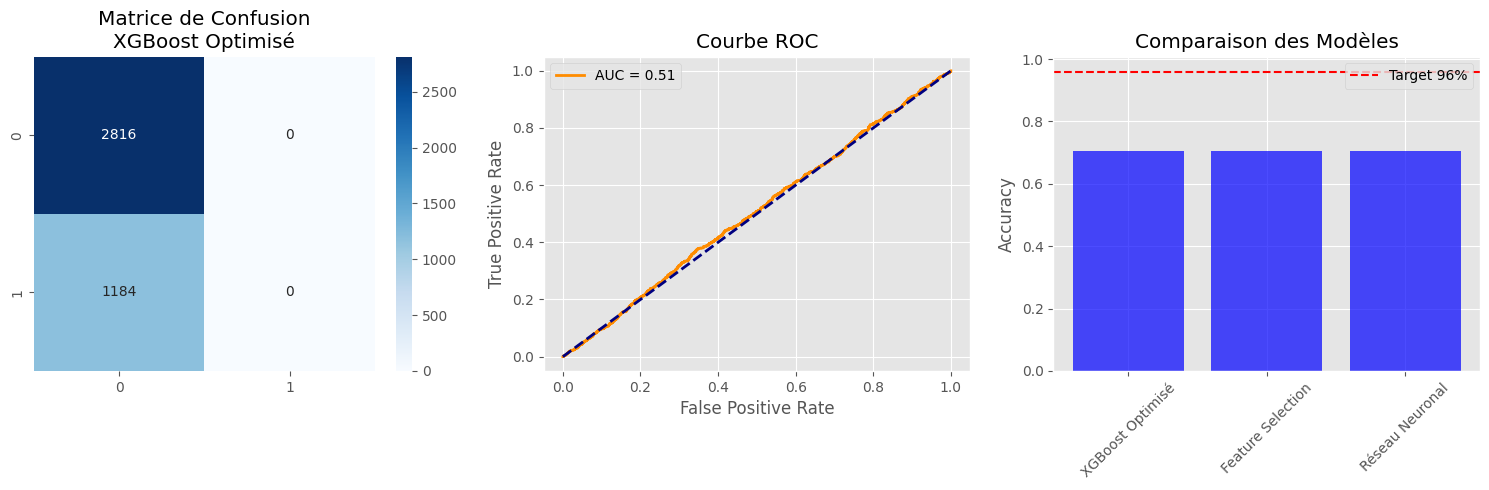

In [128]:
# Matrice de confusion du meilleur modèle
if best_model_name == 'XGBoost Optimisé':
    y_pred_best = y_pred_xgb
elif best_model_name == 'Feature Selection':
    y_pred_best = y_pred_sel
else:
    y_pred_best = y_pred_nn

# Matrice de confusion
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matrice de Confusion\n{best_model_name}')

# Courbe ROC
plt.subplot(1, 3, 2)
if best_model_name == 'XGBoost Optimisé':
    y_proba_best = best_xgb.predict_proba(X_test)[:, 1]
elif best_model_name == 'Feature Selection':
    y_proba_best = model_sel.predict_proba(X_test)[:, 1]
else:
    y_proba_best = nn_model.predict(X_test).flatten()

fpr, tpr, _ = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()

# Comparaison des modèles
plt.subplot(1, 3, 3)
models = list(results.keys())
accuracies = list(results.values())
colors = ['green' if acc >= 0.96 else 'blue' for acc in accuracies]

plt.bar(models, accuracies, color=colors, alpha=0.7)
plt.axhline(y=0.96, color='red', linestyle='--', label='Target 96%')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Comparaison des Modèles')
plt.legend()

plt.tight_layout()
plt.show()


# ***Prediction du modele le plus perforemant***:

#### Le meilleur modele utiliser est **RandomForest** , donc on le reuvaluer avec des nouveuax donees, pour revaluer la performance de ce modele  :

In [129]:
df

,Patient_ID,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
0,PID000001,69,Male,Yes,1,2,3,2.37,Moderate,Yes,Medium,Yes,Former,Yes,Normal
1,PID000002,32,Female,Yes,3,0,9,6.09,Moderate,No,Medium,No,Current,Yes,Normal
2,PID000003,89,Male,No,7,0,3,2.86,Mild,Yes,Medium,No,Current,No,Tuberculosis
3,PID000004,78,Female,Yes,2,0,6,4.57,Moderate,No,High,Yes,Never,Yes,Tuberculosis
4,PID000005,38,Male,No,7,2,5,13.86,High,Yes,Low,No,Never,Yes,Tuberculosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,PID019996,53,Male,No,0,4,6,11.72,Moderate,Yes,Medium,No,Never,Yes,Normal
19996,PID019997,27,Female,No,3,1,1,5.67,Moderate,Yes,Low,Yes,Current,Yes,Tuberculosis
19997,PID019998,23,Male,No,1,2,8,3.91,High,Yes,Low,Yes,Never,No,Normal
19998,PID019999,24,Female,No,8,4,6,8.77,Moderate,Yes,Medium,Yes,Never,Yes,Normal


In [130]:
rf_classifier.predict([[5	,  80	,	9 ,	20	,  0  ,  28  ,	0.2  ,   20, 2 , 4 ,  6,  8,  0 ]])

array([0])

In [131]:
import joblib 
joblib.dump(rf_classifier,'tuberculosis_model.pkl')

['tuberculosis_model.pkl']

### ***prediction avec le modele enregestrer***

In [132]:
MODEL=joblib.load('tuberculosis_model.pkl')
MODEL.predict([[5	,  80	,	9 ,	20	,  0  ,  28  ,	0.2  ,   20, 2 , 4 ,  6,  8,  0 ]])

array([0])